In [1]:
%load_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%aimport Variant_analysis_helper_functions


# Only subtracting gnomad singletons and doubletons

In [3]:
# Listing ENSTs with gnomad variants
gnomad_var_ENSTs = glob.glob("../outputs/mutations/cds_gnomad_snv_classified/ENST*")
gnomad_var_ENSTs = [_.split("/")[-1][:-4] for _ in gnomad_var_ENSTs]
gnomad_var_ENSTs[:5]

['ENST00000356073',
 'ENST00000348066',
 'ENST00000379044',
 'ENST00000246672',
 'ENST00000288319']

In [4]:
# Listing ENSTs with spark vars
spark_var_ENSTs =  glob.glob("../outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/ENST*")
spark_var_ENSTs = [_.split("/")[-1][:-4] for _ in spark_var_ENSTs]
spark_var_ENSTs[:5]

['ENST00000296096',
 'ENST00000419098',
 'ENST00000259803',
 'ENST00000698516',
 'ENST00000506184']

In [5]:
ENSTs = set(gnomad_var_ENSTs) & set(spark_var_ENSTs)
ENSTs

{'ENST00000056233',
 'ENST00000239243',
 'ENST00000241001',
 'ENST00000246672',
 'ENST00000250916',
 'ENST00000262238',
 'ENST00000262518',
 'ENST00000264637',
 'ENST00000265340',
 'ENST00000282549',
 'ENST00000288319',
 'ENST00000303329',
 'ENST00000309446',
 'ENST00000312233',
 'ENST00000315869',
 'ENST00000317216',
 'ENST00000318003',
 'ENST00000331340',
 'ENST00000335670',
 'ENST00000339562',
 'ENST00000341099',
 'ENST00000342988',
 'ENST00000348066',
 'ENST00000348332',
 'ENST00000355311',
 'ENST00000355995',
 'ENST00000356073',
 'ENST00000358127',
 'ENST00000359486',
 'ENST00000367265',
 'ENST00000372583',
 'ENST00000373036',
 'ENST00000373294',
 'ENST00000377022',
 'ENST00000377142',
 'ENST00000379044',
 'ENST00000380013',
 'ENST00000389506',
 'ENST00000395324',
 'ENST00000403491',
 'ENST00000428368',
 'ENST00000434704',
 'ENST00000437473',
 'ENST00000561208',
 'ENST00000592199'}

In [6]:
len(ENSTs)

45

In [48]:
gnomad_for_hist = []
for ENST in ENSTs:
    gnomad_for_hist.append(pd.read_csv("../outputs/mutations/cds_gnomad_snv_classified/" + ENST + ".bed", sep =  "\t", header = None))

gnomad_for_hist = pd.concat(gnomad_for_hist)
gnomad_for_hist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,156325748,156325749,P43354,ENST00000339562,-,2,156325748,156325749,A,G,1.200322e-06,F,L,No-Syn
1,2,156325749,156325750,P43354,ENST00000339562,-,2,156325749,156325750,A,T,1.590427e-06,P,P,Syn
2,2,156325751,156325752,P43354,ENST00000339562,-,2,156325751,156325752,G,C,1.590402e-06,P,A,No-Syn
3,2,156325752,156325753,P43354,ENST00000339562,-,2,156325752,156325753,T,C,1.200322e-06,L,L,Syn
4,2,156325755,156325756,P43354,ENST00000339562,-,2,156325755,156325756,A,C,2.736191e-06,T,T,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2,24768384,24768385,Q15788,ENST00000348332,+,2,24768384,24768385,T,C,1.613523e-06,T,T,Syn
2294,2,24768387,24768388,Q15788,ENST00000348332,+,2,24768387,24768388,A,C,1.613898e-06,E,D,No-Syn
2295,2,24768388,24768389,Q15788,ENST00000348332,+,2,24768388,24768389,T,A,6.891058e-07,*,K,No-Syn
2296,2,24768389,24768390,Q15788,ENST00000348332,+,2,24768389,24768390,A,C,1.200578e-06,*,S,No-Syn


In [70]:
# Need to add allele count info!
cols_keep = ["Chromosome", "Position", "Reference", "Alternate", "Allele Count"]
more_gnomad_info = []

for filepath in glob.glob("../raw_files/gnomAD/*"):
    df = pd.read_csv(filepath)
    df = df[cols_keep]
    more_gnomad_info.append(df)
    
more_gnomad_info = pd.concat(more_gnomad_info)
more_gnomad_info

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_34835/2737171835.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,Chromosome,Position,Reference,Alternate,Allele Count
0,2,207081141,T,C,4
1,2,207081144,AG,A,4
2,2,207081145,G,GC,1
3,2,207081145,GC,G,3
4,2,207081145,G,C,1
...,...,...,...,...,...
1775,19,13094706,G,A,1
1776,19,13094709,G,T,3
1777,19,13094711,A,G,1
1778,19,13094718,A,G,56


In [71]:
more_gnomad_info = more_gnomad_info.rename(columns = {"Chromosome" : 0, 
                                                      "Position" : 1,
                                                      "Reference" : 9,
                                                      "Alternate" : 10})


more_gnomad_info[0] = more_gnomad_info[0].astype(str)
gnomad_for_hist[0] = gnomad_for_hist[0].astype(str)

more_gnomad_info[1] = more_gnomad_info[1].astype(int)-1
gnomad_for_hist[1] = gnomad_for_hist[1].astype(int)

more_gnomad_info["Allele Count"] = more_gnomad_info["Allele Count"].astype(int)

more_gnomad_info[9] = more_gnomad_info[9].astype(str)
gnomad_for_hist[9] = gnomad_for_hist[9].astype(str)

more_gnomad_info[10] = more_gnomad_info[10].astype(str)
gnomad_for_hist[10] = gnomad_for_hist[10].astype(str)

more_gnomad_info

,0,1,9,10,Allele Count
0,2,207081140,T,C,4
1,2,207081143,AG,A,4
2,2,207081144,G,GC,1
3,2,207081144,GC,G,3
4,2,207081144,G,C,1
...,...,...,...,...,...
1775,19,13094705,G,A,1
1776,19,13094708,G,T,3
1777,19,13094710,A,G,1
1778,19,13094717,A,G,56


In [75]:
gnomad_for_hist = pd.merge(gnomad_for_hist, more_gnomad_info)
gnomad_for_hist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Allele Count
0,2,156325748,156325749,P43354,ENST00000339562,-,2,156325748,156325749,A,G,1.200322e-06,F,L,No-Syn,1
1,2,156325749,156325750,P43354,ENST00000339562,-,2,156325749,156325750,A,T,1.590427e-06,P,P,Syn,1
2,2,156325751,156325752,P43354,ENST00000339562,-,2,156325751,156325752,G,C,1.590402e-06,P,A,No-Syn,1
3,2,156325752,156325753,P43354,ENST00000339562,-,2,156325752,156325753,T,C,1.200322e-06,L,L,Syn,1
4,2,156325755,156325756,P43354,ENST00000339562,-,2,156325755,156325756,A,C,2.736191e-06,T,T,Syn,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62878,2,24768384,24768385,Q15788,ENST00000348332,+,2,24768384,24768385,T,C,1.613523e-06,T,T,Syn,1
62879,2,24768387,24768388,Q15788,ENST00000348332,+,2,24768387,24768388,A,C,1.613898e-06,E,D,No-Syn,1
62880,2,24768388,24768389,Q15788,ENST00000348332,+,2,24768388,24768389,T,A,6.891058e-07,*,K,No-Syn,1
62881,2,24768389,24768390,Q15788,ENST00000348332,+,2,24768389,24768390,A,C,1.200578e-06,*,S,No-Syn,1


In [77]:
sum(gnomad_for_hist["Allele Count"] > 2)

23148

In [78]:
sum(gnomad_for_hist["Allele Count"] <= 2)

39735

In [80]:
common_gnomad = gnomad_for_hist[gnomad_for_hist["Allele Count"] > 2]
common_gnomad

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Allele Count
4,2,156325755,156325756,P43354,ENST00000339562,-,2,156325755,156325756,A,C,0.000003,T,T,Syn,4
7,2,156325763,156325764,P43354,ENST00000339562,-,2,156325763,156325764,G,A,0.000063,L,L,Syn,49
13,2,156325779,156325780,P43354,ENST00000339562,-,2,156325779,156325780,T,A,0.000012,I,I,Syn,20
15,2,156325788,156325789,P43354,ENST00000339562,-,2,156325788,156325789,C,T,0.000014,P,P,Syn,22
17,2,156325794,156325795,P43354,ENST00000339562,-,2,156325794,156325795,C,T,0.000010,V,V,Syn,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62868,2,24768350,24768351,Q15788,ENST00000348332,+,2,24768350,24768351,C,G,0.000003,A,G,No-Syn,3
62870,2,24768355,24768356,Q15788,ENST00000348332,+,2,24768355,24768356,C,G,0.000002,Q,E,No-Syn,3
62874,2,24768375,24768376,Q15788,ENST00000348332,+,2,24768375,24768376,G,T,0.000002,Q,H,No-Syn,3
62876,2,24768378,24768379,Q15788,ENST00000348332,+,2,24768378,24768379,A,G,0.000004,L,L,Syn,4


In [115]:
# For each ENST, reading in all SPARK vars
ENST_col = []
cds_all_spark = []
cds_only_spark = []
AD_all_spark = []
AD_only_spark = []
DBD_all_spark = []
DBD_only_spark = []


for ENST in ENSTs:
    ENST_col.append(ENST)
#for ENST in ["ENST00000592199"]:
    
    # ENST's SPARK vars 
    all_spark = pd.read_csv("../outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + ENST + ".bed", sep = "\t", header = None)
    # Filter to missense 
    all_spark = all_spark[all_spark[13] == "No-Syn"]
    cds_all_spark.append(len(all_spark))
    all_spark[0] = all_spark[0].astype(str)
    
    # ENST's gnomAD vars
    # all_gnomad = pd.read_csv("../outputs/mutations/cds_gnomad_snv_classified/" + ENST + ".bed", sep =  "\t", header = None)
    # all_gnomad = all_gnomad[all_gnomad[11] > 0.01 / 100] # ONLY KEEP VARIANTS SEEN MORE THAN TWICE
    all_gnomad = common_gnomad.copy(deep = True)
    all_gnomad[0] = all_gnomad[0].astype(str)
    
    # only keep those not in gnomAD
    spark_only = pd.merge(all_spark, all_gnomad[[0, 1, 2, 9, 10]], left_on = [0, 1, 2, 8, 9], right_on = [0, 1, 2, 9, 10], indicator = True, how = "left")
    spark_only = spark_only[spark_only["_merge"] == "left_only"]
    cds_only_spark.append(len(spark_only))

    # Read in domain variants
    domain_vars = pd.read_csv("../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/" + ENST + ".bed", sep =  "\t", header = None)
    domain_vars = domain_vars[domain_vars[21] == "No-Syn"]
    domain_vars[0] = domain_vars[0].astype(str)
    AD_all_spark.append(len(domain_vars[domain_vars[3] == "AD"]))
    DBD_all_spark.append(len(domain_vars[domain_vars[3] == "DBD"]))
    
    # only keep those not in gnomAD
    spark_only_domain_vars = pd.merge(domain_vars, spark_only[[0, 1, 2, 8, "9_x"]], right_on = [0, 1, 2, 8, "9_x"], left_on = [0, 1, 2, 16,17], suffixes = ["A", "B"])
    #display(spark_only_domain_vars)

    AD_only_spark.append(len(spark_only_domain_vars[spark_only_domain_vars[3] == "AD"]))
    DBD_only_spark.append(len(spark_only_domain_vars[spark_only_domain_vars[3] == "DBD"]))


count_results = pd.DataFrame({"ENST" : ENST_col,
                              "cds_all_spark" : cds_all_spark, 
                              "cds_only_spark" : cds_only_spark,
                             "AD_all_spark" : AD_all_spark,
                                "AD_only_spark" : AD_only_spark,
                                "DBD_all_spark" : DBD_all_spark,
                                "DBD_only_spark": DBD_only_spark})
count_results

,ENST,cds_all_spark,cds_only_spark,AD_all_spark,AD_only_spark,DBD_all_spark,DBD_only_spark
0,ENST00000339562,159,78,16,14,9,7
1,ENST00000318003,435,121,13,6,435,121
2,ENST00000358127,93,31,15,3,10,5
3,ENST00000341099,209,69,126,46,27,9
4,ENST00000367265,542,259,38,15,20,10
5,ENST00000348066,449,190,108,58,18,12
6,ENST00000373294,127,56,19,7,42,22
7,ENST00000264637,125,70,13,9,19,14
8,ENST00000428368,281,127,69,29,20,11
9,ENST00000303329,217,77,49,15,8,3


In [116]:
sum(count_results["cds_only_spark"]) / sum(count_results["cds_all_spark"])
# So you lose a little over half the variants

0.4631705364291433

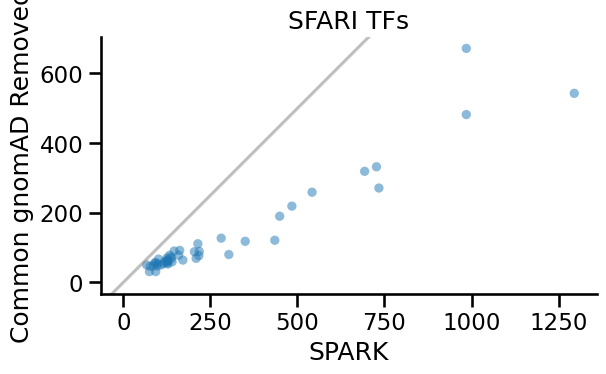

In [88]:
sns.set_context('talk')
g = sns.scatterplot(data = count_results, x = "cds_all_spark", y = "cds_only_spark", alpha = 0.5, s = 45, edgecolor = 'none')
g.axline((0, 0), slope=1, color='gray', ls='solid', alpha = 0.5)

plt.title("Variant Counts, SFARI TFs")
plt.xlabel("SPARK")
plt.ylabel("Common gnomAD Removed")

sns.despine()
plt.gca().set_aspect('equal')
plt.title("SFARI TFs");

In [89]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [90]:
def plot_log_regplot_and_eq(data, x, y, log = True, scatter_color = sns.color_palette("tab10")[0], line_color = "gray", text_x = 0.1, text_y = 0.9):
    sns.set_context('talk')
    g = sns.regplot(data = data, x = x, y = y, 
                    scatter_kws = {'alpha' : 0.5, 's' : 20, 'color' : scatter_color}, 
                    line_kws = {'alpha' : 1, 'color' : line_color}, label = x.split("_")[0])

    extreme = max(max(data[x]), max(data[y]))
    
    if log:
        plt.xscale('log')
        plt.yscale('log')
    

    plt.gca().set_aspect('equal')
    # g.set_xlim(1, extreme)
    # g.set_ylim(1, extreme)
    
    sns.despine()
    pearson_r, _ = stats.pearsonr(data[x], data[y])

    slope, intercept, r_value, p_value, std_err = stats.linregress(data[x], data[y])
    
    correlation_text = f"Pearson r = {pearson_r:.2f}"
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.text(text_x, text_y, equation, transform=plt.gca().transAxes, fontsize=14, color=scatter_color)
    plt.text(text_x, text_y - 0.3, correlation_text, transform=plt.gca().transAxes, fontsize=14, color=scatter_color)


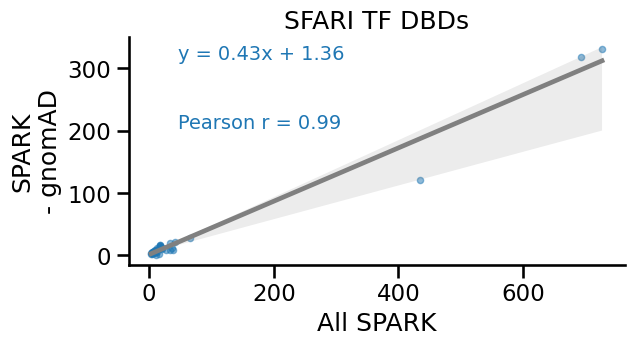

In [91]:
plot_log_regplot_and_eq(count_results, "DBD_all_spark", "DBD_only_spark", log = False)
plt.ylabel("SPARK\n- gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF DBDs");

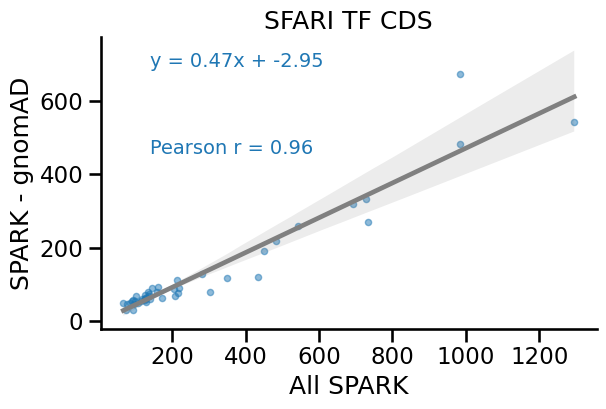

In [92]:
plot_log_regplot_and_eq(count_results, "cds_all_spark", "cds_only_spark", log = False)
plt.ylabel("SPARK - gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF CDS");

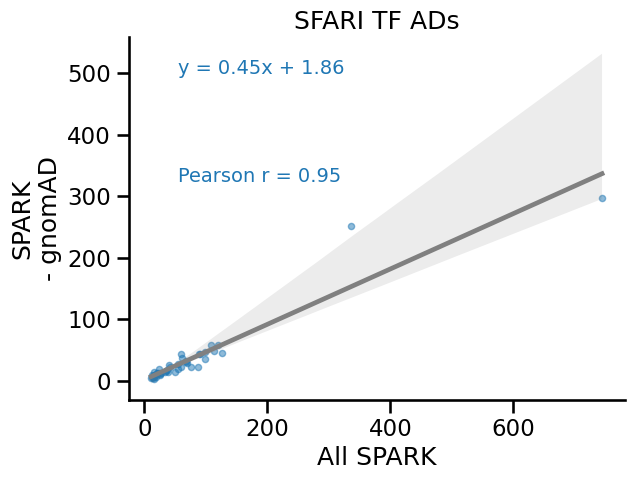

In [93]:
plot_log_regplot_and_eq(count_results, "AD_all_spark", "AD_only_spark", log = False)
plt.ylabel("SPARK\n- gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF ADs");

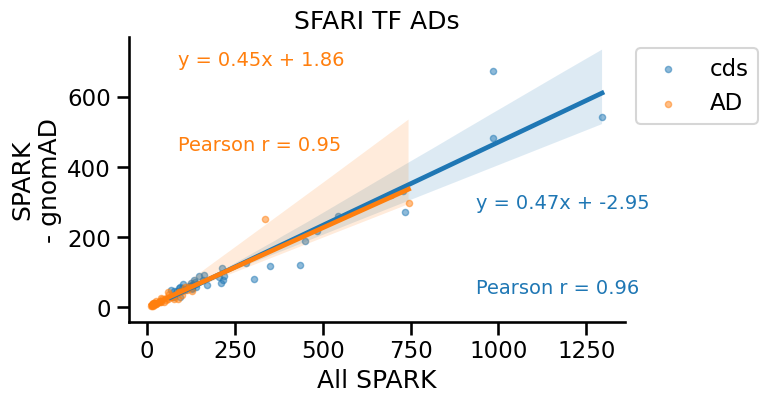

In [94]:
plot_log_regplot_and_eq(count_results, "cds_all_spark", "cds_only_spark", log = False,
                       scatter_color = sns.color_palette("tab10")[0], line_color = sns.color_palette("tab10")[0],
                       text_x = 0.7, text_y = 0.4)
plot_log_regplot_and_eq(count_results, "AD_all_spark", "AD_only_spark", log = False,
                       scatter_color = sns.color_palette("tab10")[1], line_color = sns.color_palette("tab10")[1]
                       )
plt.ylabel("SPARK\n- gnomAD")
plt.xlabel("All SPARK")
plt.title("SFARI TF ADs")

plt.legend()
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))


Running enrichment analysis pipeline

In [95]:
prior_enrich_analysis = pd.read_csv("../outputs/enrichment_analysis_summary_table.csv", index_col = 0)
prior_enrich_analysis

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154,217,0.100743,582,49,0.084192,162,8,0.049383,240,26,0.108333,1.261400e-01
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,171,3,0.017544,198,17,0.085859,4.800899e-01
2,AR,P10275,2763,219,0.079262,2259,182,0.080567,210,9,0.042857,750,88,0.117333,6.488056e-01
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
4,CC2D1A,Q6P1N0,2856,435,0.152311,117,13,0.111111,2853,435,0.152471,0,0,NaN,2.376139e-01
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01
6,EBF3,Q9H4W6,1791,138,0.077052,240,17,0.070833,693,34,0.049062,0,0,NaN,7.951436e-01
7,EGR3,Q06889,1164,101,0.086770,606,61,0.100660,213,12,0.056338,63,1,0.015873,9.507787e-02
8,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,210,27,0.128571,480,60,0.125000,1.394075e-01
9,GLIS1,Q8NBF1,1863,303,0.162641,522,75,0.143678,381,38,0.099738,240,23,0.095833,1.841198e-01


In [96]:
uniprot_ENST = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv", index_col = 0)
uniprot_ENST["ENST"] = uniprot_ENST["ENST"].str.split(".").str[0]
uniprot_ENST

,uniprotID,ENST
0,Q9H2P0,ENST00000349014
1,Q5TGY3,ENST00000247087
2,Q96QS3,ENST00000379044
3,Q96JM3,ENST00000361283
4,Q96RK0,ENST00000575354
...,...,...
117,Q8NEK5,ENST00000366197
118,Q9BR84,ENST00000393883
119,Q68DY1,ENST00000601440
120,Q9Y462,ENST00000276123


In [97]:
count_results = pd.merge(count_results, uniprot_ENST, how = "left")
count_results

,ENST,cds_all_spark,cds_only_spark,AD_all_spark,AD_only_spark,DBD_all_spark,DBD_only_spark,uniprotID
0,ENST00000339562,159,78,16,14,9,7,P43354
1,ENST00000318003,435,121,13,6,435,121,Q6P1N0
2,ENST00000358127,93,31,15,3,10,5,Q02548
3,ENST00000341099,209,69,126,46,27,9,Q92731
4,ENST00000367265,542,259,38,15,20,10,Q9UGL1
5,ENST00000348066,449,190,108,58,18,12,O94983
6,ENST00000373294,127,56,19,7,42,22,Q9Y458
7,ENST00000264637,125,70,13,9,19,14,P10827
8,ENST00000428368,281,127,69,29,20,11,Q9UL68
9,ENST00000303329,217,77,49,15,8,3,Q9HBZ2


In [98]:
full_tbl = pd.merge(count_results, prior_enrich_analysis, how = "left")
full_tbl

,ENST,cds_all_spark,cds_only_spark,AD_all_spark,AD_only_spark,DBD_all_spark,DBD_only_spark,uniprotID,gene-symbol,TF_cds_length,...,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ENST00000339562,159,78,16,14,9,7,P43354,NR4A2,1797.0,...,318.0,16.0,0.050314,210.0,9.0,0.042857,1080.0,116.0,0.107407,6.456734e-03
1,ENST00000318003,435,121,13,6,435,121,Q6P1N0,CC2D1A,2856.0,...,117.0,13.0,0.111111,2853.0,435.0,0.152471,0.0,0.0,NaN,2.376139e-01
2,ENST00000358127,93,31,15,3,10,5,Q02548,PAX5,1176.0,...,165.0,15.0,0.090909,375.0,10.0,0.026667,99.0,11.0,0.111111,5.343300e-01
3,ENST00000341099,209,69,126,46,27,9,Q92731,ESR2,1593.0,...,1035.0,126.0,0.121739,210.0,27.0,0.128571,480.0,60.0,0.125000,1.394075e-01
4,ENST00000367265,542,259,38,15,20,10,Q9UGL1,KDM5B,4635.0,...,270.0,38.0,0.140741,255.0,20.0,0.078431,351.0,36.0,0.102564,2.051619e-01
5,ENST00000348066,449,190,108,58,18,12,O94983,CAMTA2,3609.0,...,882.0,108.0,0.122449,339.0,18.0,0.053097,1167.0,149.0,0.127678,8.604581e-01
6,ENST00000373294,127,56,19,7,42,22,Q9Y458,TBX22,1563.0,...,240.0,19.0,0.079167,570.0,42.0,0.073684,240.0,18.0,0.075000,1.000000e+00
7,ENST00000264637,125,70,13,9,19,14,P10827,THRA,1473.0,...,156.0,13.0,0.083333,216.0,19.0,0.087963,0.0,0.0,NaN,1.000000e+00
8,ENST00000428368,281,127,69,29,20,11,Q9UL68,MYT1L,3561.0,...,822.0,69.0,0.083942,552.0,20.0,0.036232,720.0,47.0,0.065278,5.551851e-01
9,ENST00000303329,217,77,49,15,8,3,Q9HBZ2,ARNT2,2154.0,...,582.0,49.0,0.084192,162.0,8.0,0.049383,240.0,26.0,0.108333,1.261400e-01


In [99]:
full_tbl.columns

Index(['ENST', 'cds_all_spark', 'cds_only_spark', 'AD_all_spark',
       'AD_only_spark', 'DBD_all_spark', 'DBD_only_spark', 'uniprotID',
       'gene-symbol', 'TF_cds_length', 'TF_missense', 'TF_missense_prop',
       'AD_cds_length', 'AD_missense', 'AD_missense_prop', 'DBD_cds_length',
       'DBD_missense', 'DBD_missense_prop', 'RD_cds_length', 'RD_missense',
       'RD_missense_prop', 'ADvsTF_fisher_exact_p_vals'],
      dtype='object')

In [100]:
full_tbl_subset = full_tbl[["gene-symbol", "uniprotID", "TF_cds_length", "cds_only_spark", "AD_cds_length", "AD_only_spark", "DBD_cds_length", "DBD_only_spark"]].dropna().sort_values(by = "gene-symbol")
full_tbl_subset = full_tbl_subset.rename(columns = {"cds_only_spark" : "TF_missense", "AD_only_spark" : "AD_missense", "DBD_only_spark": "DBD_missense"})
full_tbl_subset

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense
9,ARNT2,Q9HBZ2,2154.0,77,582.0,15,162.0,3
27,ARX,Q96QS3,1689.0,90,273.0,13,171.0,3
5,CAMTA2,O94983,3609.0,190,882.0,58,339.0,12
35,CASZ1,Q86V15,5280.0,271,465.0,23,825.0,28
1,CC2D1A,Q6P1N0,2856.0,121,117.0,6,2853.0,121
40,EBF3,Q9H4W6,1791.0,68,240.0,9,693.0,20
21,EGR3,Q06889,1164.0,67,606.0,37,213.0,11
30,ERG,P11308,1440.0,53,573.0,28,240.0,3
3,ESR2,Q92731,1593.0,69,1035.0,46,210.0,9
29,GLIS1,Q8NBF1,1863.0,80,522.0,23,381.0,8


In [101]:
full_tbl_subset["TF_missense_prop"] = full_tbl_subset["TF_missense"] / full_tbl_subset["TF_cds_length"]
full_tbl_subset["AD_missense_prop"] = full_tbl_subset["AD_missense"] / full_tbl_subset["AD_cds_length"]
full_tbl_subset["DBD_missense_prop"] = full_tbl_subset["DBD_missense"] / full_tbl_subset["DBD_cds_length"]
full_tbl_subset = full_tbl_subset.reset_index(drop = True)
full_tbl_subset

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop
0,ARNT2,Q9HBZ2,2154.0,77,582.0,15,162.0,3,0.035747,0.025773,0.018519
1,ARX,Q96QS3,1689.0,90,273.0,13,171.0,3,0.053286,0.047619,0.017544
2,CAMTA2,O94983,3609.0,190,882.0,58,339.0,12,0.052646,0.065760,0.035398
3,CASZ1,Q86V15,5280.0,271,465.0,23,825.0,28,0.051326,0.049462,0.033939
4,CC2D1A,Q6P1N0,2856.0,121,117.0,6,2853.0,121,0.042367,0.051282,0.042411
5,EBF3,Q9H4W6,1791.0,68,240.0,9,693.0,20,0.037968,0.037500,0.028860
6,EGR3,Q06889,1164.0,67,606.0,37,213.0,11,0.057560,0.061056,0.051643
7,ERG,P11308,1440.0,53,573.0,28,240.0,3,0.036806,0.048866,0.012500
8,ESR2,Q92731,1593.0,69,1035.0,46,210.0,9,0.043315,0.044444,0.042857
9,GLIS1,Q8NBF1,1863.0,80,522.0,23,381.0,8,0.042941,0.044061,0.020997


AD vs TF first

In [102]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(full_tbl_subset, "AD")

display(full_tbl_subset)
decisions = Variant_analysis_helper_functions.benjamini_hochberg(full_tbl_subset["ADvsTF_fisher_exact_p_vals"], 0.1)
sig_output = full_tbl_subset[decisions]
sig_output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154.0,77,582.0,15,162.0,3,0.035747,0.025773,0.018519,0.150542
1,ARX,Q96QS3,1689.0,90,273.0,13,171.0,3,0.053286,0.047619,0.017544,0.768749
2,CAMTA2,O94983,3609.0,190,882.0,58,339.0,12,0.052646,0.065760,0.035398,0.055908
3,CASZ1,Q86V15,5280.0,271,465.0,23,825.0,28,0.051326,0.049462,0.033939,1.000000
4,CC2D1A,Q6P1N0,2856.0,121,117.0,6,2853.0,121,0.042367,0.051282,0.042411,0.635237
5,EBF3,Q9H4W6,1791.0,68,240.0,9,693.0,20,0.037968,0.037500,0.028860,1.000000
6,EGR3,Q06889,1164.0,67,606.0,37,213.0,11,0.057560,0.061056,0.051643,0.616459
7,ERG,P11308,1440.0,53,573.0,28,240.0,3,0.036806,0.048866,0.012500,0.062133
8,ESR2,Q92731,1593.0,69,1035.0,46,210.0,9,0.043315,0.044444,0.042857,0.797954
9,GLIS1,Q8NBF1,1863.0,80,522.0,23,381.0,8,0.042941,0.044061,0.020997,0.898913


,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals


In [103]:
sig_output.sort_values(by = "ADvsTF_fisher_exact_p_vals")[["gene-symbol"]]

,gene-symbol


In [104]:
# multiple genes have enriched AD vs TF!

---
AD vs DBD

In [105]:
contains_DBD = full_tbl_subset[full_tbl_subset["DBD_cds_length"] != 0]
contains_DBD = contains_DBD.reset_index(drop = True)
contains_DBD

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154.0,77,582.0,15,162.0,3,0.035747,0.025773,0.018519,0.150542
1,ARX,Q96QS3,1689.0,90,273.0,13,171.0,3,0.053286,0.047619,0.017544,0.768749
2,CAMTA2,O94983,3609.0,190,882.0,58,339.0,12,0.052646,0.065760,0.035398,0.055908
3,CASZ1,Q86V15,5280.0,271,465.0,23,825.0,28,0.051326,0.049462,0.033939,1.000000
4,CC2D1A,Q6P1N0,2856.0,121,117.0,6,2853.0,121,0.042367,0.051282,0.042411,0.635237
5,EBF3,Q9H4W6,1791.0,68,240.0,9,693.0,20,0.037968,0.037500,0.028860,1.000000
6,EGR3,Q06889,1164.0,67,606.0,37,213.0,11,0.057560,0.061056,0.051643,0.616459
7,ERG,P11308,1440.0,53,573.0,28,240.0,3,0.036806,0.048866,0.012500,0.062133
8,ESR2,Q92731,1593.0,69,1035.0,46,210.0,9,0.043315,0.044444,0.042857,0.797954
9,GLIS1,Q8NBF1,1863.0,80,522.0,23,381.0,8,0.042941,0.044061,0.020997,0.898913


In [106]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(contains_DBD, "AD", "DBD")

[[15, 3], [567.0, 159.0]]
[[13, 3], [260.0, 168.0]]
[[58, 12], [824.0, 327.0]]
[[23, 28], [442.0, 797.0]]
[[6, 121], [111.0, 2732.0]]
[[9, 20], [231.0, 673.0]]
[[37, 11], [569.0, 202.0]]
[[28, 3], [545.0, 237.0]]
[[46, 9], [989.0, 201.0]]
[[23, 8], [499.0, 373.0]]
[[252, 15], [2340.0, 267.0]]
[[17, 9], [229.0, 270.0]]
[[15, 10], [255.0, 245.0]]
[[9, 11], [123.0, 208.0]]
[[12, 2], [288.0, 217.0]]
[[19, 4], [401.0, 140.0]]
[[43, 4], [1118.0, 140.0]]
[[32, 4], [382.0, 170.0]]
[[4, 2], [98.0, 169.0]]
[[47, 16], [844.0, 434.0]]
[[29, 11], [793.0, 541.0]]
[[49, 6], [1181.0, 162.0]]
[[35, 11], [565.0, 178.0]]
[[4, 15], [245.0, 300.0]]
[[9, 11], [258.0, 304.0]]
[[16, 7], [146.0, 164.0]]
[[43, 5], [791.0, 208.0]]
[[14, 7], [304.0, 203.0]]
[[31, 6], [518.0, 165.0]]
[[3, 5], [162.0, 370.0]]
[[23, 16], [433.0, 530.0]]
[[12, 5], [138.0, 166.0]]
[[6, 5], [336.0, 205.0]]
[[26, 7], [901.0, 299.0]]
[[298, 1], [5414.0, 116.0]]
[[7, 22], [233.0, 548.0]]
[[58, 332], [923.0, 5548.0]]
[[11, 5], [472.0, 157.

In [107]:
contains_DBD.sort_values(by = "ADvsDBD_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals
10,HIVEP3,Q5T1R4,7221.0,672,2592.0,252,282.0,15,0.093062,0.097222,0.053191,0.375291,0.012886
17,MEIS2,O14770,1434.0,73,414.0,32,174.0,4,0.050907,0.077295,0.022989,0.005183,0.013074
7,ERG,P11308,1440.0,53,573.0,28,240.0,3,0.036806,0.048866,0.012500,0.062133,0.014429
34,SRCAP,Q6ZRS2,9693.0,543,5712.0,298,117.0,1,0.056020,0.052171,0.008547,0.053474,0.031018
2,CAMTA2,O94983,3609.0,190,882.0,58,339.0,12,0.052646,0.065760,0.035398,0.055908,0.039934
43,YY1,P25490,1245.0,55,288.0,15,294.0,6,0.044177,0.052083,0.020408,0.512436,0.046390
31,PITX1,P78337,945.0,60,150.0,12,171.0,5,0.063492,0.080000,0.029240,0.362354,0.048487
25,NKX2-2,O95096,822.0,54,162.0,16,171.0,7,0.065693,0.098765,0.040936,0.074871,0.050423
14,KLF7,O75840,909.0,31,300.0,12,219.0,2,0.034103,0.040000,0.009132,0.560338,0.050991
23,NFIA,Q12857,1530.0,54,249.0,4,315.0,15,0.035294,0.016064,0.047619,0.089131,0.057590


In [108]:
contains_DBD_sig = Variant_analysis_helper_functions.return_bh_sig(contains_DBD, "ADvsDBD_fisher_exact_p_vals", 0.1)
contains_DBD_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals


In [109]:
# Multiple genes have enriched ADs relative to DBDs!

In [110]:
contains_DBD_sig.sort_values(by = "ADvsDBD_fisher_exact_p_vals")[["gene-symbol"]]

,gene-symbol


---
Comparing all hits 

AD vs TF

In [138]:
# Prior hits
ad_vs_tf_hits = ['CASZ1', 'MEIS2', 'NCOA1', 'NR4A2', 'NKX2-2', 
                 'RORA', 'TCF7L2', 'YY1']
print(ad_vs_tf_hits)

# Keeping results which were hits
ad_vs_tf_hits_tbl = full_tbl_subset[full_tbl_subset['gene-symbol'].isin(ad_vs_tf_hits)]
display(ad_vs_tf_hits_tbl)

# Summming together variants
domain_var_nt = sum(ad_vs_tf_hits_tbl["AD_missense"])
TF_var_nt =  sum(ad_vs_tf_hits_tbl["TF_missense"])

domain_nt_len = sum(ad_vs_tf_hits_tbl["AD_cds_length"])
TF_nt_len =  sum(ad_vs_tf_hits_tbl["TF_cds_length"])

data = [[domain_var_nt, TF_var_nt - domain_var_nt],
                   [domain_nt_len - domain_var_nt, TF_nt_len - TF_var_nt - domain_nt_len + domain_var_nt]]
print(data)

p_val = stats.fisher_exact(data)[1]
p_val #NOT SIGNIFICANT

['CASZ1', 'MEIS2', 'NCOA1', 'NR4A2', 'NKX2-2', 'RORA', 'TCF7L2', 'YY1']


,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
3,CASZ1,Q86V15,5280.0,271,465.0,23,825.0,28,0.051326,0.049462,0.033939,1.000000
17,MEIS2,O14770,1434.0,73,414.0,32,174.0,4,0.050907,0.077295,0.022989,0.005183
21,NCOA1,Q15788,4326.0,219,1230.0,49,168.0,6,0.050624,0.039837,0.035714,0.045377
25,NKX2-2,O95096,822.0,54,162.0,16,171.0,7,0.065693,0.098765,0.040936,0.074871
27,NR4A2,P43354,1797.0,78,318.0,14,210.0,7,0.043406,0.044025,0.033333,1.000000
32,RORA,P35398,1572.0,59,342.0,6,210.0,5,0.037532,0.017544,0.023810,0.024612
38,TCF7L2,Q9NQB0,1860.0,88,300.0,9,207.0,5,0.047312,0.030000,0.024155,0.138297
43,YY1,P25490,1245.0,55,288.0,15,294.0,6,0.044177,0.052083,0.020408,0.512436


[[164, 733], [3355.0, 14084.0]]


0.5143261279958231

- - -
 AD vs DBD

In [142]:
# Prior hits
ad_vs_dbd_hits = ['ARX', 'CASZ1', 'CAMTA2', 'ERG', 'HIVEP3', 
                 'IKZF1', 'KDM5B', 'KLF16', 'KLF7', 'MEIS2', 'MTF1', 'MYT1L', 'NR1D1', 
                 'NKX2-2', 'OTX1', 'PAX5', 'PAX6', 'PITX1', 'TFE3', 'YY1']
print(ad_vs_dbd_hits)

ad_vs_dbd_hits_tbl = full_tbl_subset[full_tbl_subset['gene-symbol'].isin(ad_vs_dbd_hits)]
display(ad_vs_dbd_hits_tbl)

# Summming together variants
domain_var_nt = sum(ad_vs_dbd_hits_tbl["AD_missense"])
TF_var_nt =  sum(ad_vs_dbd_hits_tbl["TF_missense"])

domain_nt_len = sum(ad_vs_dbd_hits_tbl["AD_cds_length"])
TF_nt_len =  sum(ad_vs_dbd_hits_tbl["TF_cds_length"])

data = [[domain_var_nt, TF_var_nt - domain_var_nt],
                   [domain_nt_len - domain_var_nt, TF_nt_len - TF_var_nt - domain_nt_len + domain_var_nt]]
p_val = stats.fisher_exact(data)[1]
p_val #SIGNIFICANT

['ARX', 'CASZ1', 'CAMTA2', 'ERG', 'HIVEP3', 'IKZF1', 'KDM5B', 'KLF16', 'KLF7', 'MEIS2', 'MTF1', 'MYT1L', 'NR1D1', 'NKX2-2', 'OTX1', 'PAX5', 'PAX6', 'PITX1', 'TFE3', 'YY1']


,gene-symbol,uniprotID,TF_cds_length,TF_missense,AD_cds_length,AD_missense,DBD_cds_length,DBD_missense,TF_missense_prop,AD_missense_prop,DBD_missense_prop,ADvsTF_fisher_exact_p_vals
1,ARX,Q96QS3,1689.0,90,273.0,13,171.0,3,0.053286,0.047619,0.017544,0.768749
2,CAMTA2,O94983,3609.0,190,882.0,58,339.0,12,0.052646,0.065760,0.035398,0.055908
3,CASZ1,Q86V15,5280.0,271,465.0,23,825.0,28,0.051326,0.049462,0.033939,1.000000
7,ERG,P11308,1440.0,53,573.0,28,240.0,3,0.036806,0.048866,0.012500,0.062133
10,HIVEP3,Q5T1R4,7221.0,672,2592.0,252,282.0,15,0.093062,0.097222,0.053191,0.375291
11,IKZF1,Q13422,1560.0,92,246.0,17,279.0,9,0.058974,0.069106,0.032258,0.461189
12,KDM5B,Q9UGL1,4635.0,259,270.0,15,255.0,10,0.055879,0.055556,0.039216,1.000000
13,KLF16,Q9BXK1,759.0,60,132.0,9,219.0,11,0.079051,0.068182,0.050228,0.723997
14,KLF7,O75840,909.0,31,300.0,12,219.0,2,0.034103,0.040000,0.009132,0.560338
17,MEIS2,O14770,1434.0,73,414.0,32,174.0,4,0.050907,0.077295,0.022989,0.005183


0.00034313933672179455